In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('sp500.csv')

In [20]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03-01-00,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,04-01-00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,05-01-00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,06-01-00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,07-01-00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


In [26]:
df_processed = df.iloc[:,1:2].values
scaler = MinMaxScaler(feature_range = (0,1))
df_scaled = scaler.fit_transform(df_processed)

In [29]:
df_scaled

array([[0.35430066],
       [0.3480082 ],
       [0.322982  ],
       ...,
       [0.99626857],
       [1.        ],
       [0.99525945]])

In [31]:
features_set=[]
labels = []

for i in range(60, 4697):
    features_set.append(df_scaled[i-60:i,0])
    labels.append(df_scaled[i,0])
    

In [33]:
features_set, labels = np.array(features_set), np.array(labels)

In [36]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [37]:
features_set

array([[[0.35430066],
        [0.3480082 ],
        [0.322982  ],
        ...,
        [0.38035843],
        [0.38040776],
        [0.37879317]],

       [[0.3480082 ],
        [0.322982  ],
        [0.32418843],
        ...,
        [0.38040776],
        [0.37879317],
        [0.37155889]],

       [[0.322982  ],
        [0.32418843],
        [0.32478941],
        ...,
        [0.37879317],
        [0.37155889],
        [0.37191322]],

       ...,

       [[0.92802491],
        [0.93017323],
        [0.93985636],
        ...,
        [0.97910451],
        [0.9891239 ],
        [0.99664075]],

       [[0.93017323],
        [0.93985636],
        [0.93581987],
        ...,
        [0.9891239 ],
        [0.99664075],
        [0.99626857]],

       [[0.93985636],
        [0.93581987],
        [0.94225128],
        ...,
        [0.99664075],
        [0.99626857],
        [1.        ]]])

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [41]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape=(features_set.shape[1],1)))

In [42]:
model.add(Dropout(0.2))

In [44]:
model.add(LSTM(units = 50, return_sequences =True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences =True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

In [45]:
model.add(Dense(units = 1))

In [46]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [48]:
model.fit(features_set, labels, epochs = 100, batch_size =32)


Epoch 1/100
4637/4637 [==============================] - 22s 5ms/step - loss: 0.0076
Epoch 2/100
4637/4637 [==============================] - 19s 4ms/step - loss: 0.0018
Epoch 3/100
4637/4637 [==============================] - 19s 4ms/step - loss: 0.0018
Epoch 4/100
4637/4637 [==============================] - 19s 4ms/step - loss: 0.0016
Epoch 5/100
4637/4637 [==============================] - 19s 4ms/step - loss: 0.0016
Epoch 6/100
4637/4637 [==============================] - 19s 4ms/step - loss: 0.0016
Epoch 7/100
4637/4637 [==============================] - 20s 4ms/step - loss: 0.0015
Epoch 8/100
4637/4637 [==============================] - 20s 4ms/step - loss: 0.0013
Epoch 9/100
4637/4637 [==============================] - 24s 5ms/step - loss: 0.0012
Epoch 10/100
4637/4637 [==============================] - 21s 5ms/step - loss: 0.0012
Epoch 11/100
4637/4637 [==============================] - 23s 5ms/step - loss: 0.0011
Epoch 12/100
4637/4637 [==============================] - 22s 

4637/4637 [==============================] - 23s 5ms/step - loss: 5.0478e-04
Epoch 91/100
4637/4637 [==============================] - 23s 5ms/step - loss: 4.5204e-04
Epoch 92/100
4637/4637 [==============================] - 23s 5ms/step - loss: 4.9271e-04
Epoch 93/100
4637/4637 [==============================] - 23s 5ms/step - loss: 4.7277e-04
Epoch 94/100
4637/4637 [==============================] - 20s 4ms/step - loss: 5.0803e-04
Epoch 95/100
4637/4637 [==============================] - 17s 4ms/step - loss: 4.6475e-04
Epoch 96/100
4637/4637 [==============================] - 17s 4ms/step - loss: 4.8606e-04
Epoch 97/100
4637/4637 [==============================] - 20s 4ms/step - loss: 4.3394e-04
Epoch 98/100
4637/4637 [==============================] - 20s 4ms/step - loss: 4.6248e-04
Epoch 99/100
4637/4637 [==============================] - 21s 5ms/step - loss: 4.6004e-04
Epoch 100/100
4637/4637 [==============================] - 22s 5ms/step - loss: 4.7041e-04


In [52]:
df_testing = pd.read_csv('Sp500_testing.csv')
df_testing_processed = df_testing.iloc[:,1:2].values

In [54]:
df_total = pd.concat((df_testing['Open'], df_testing['Open']), axis = 0)

In [55]:
test_inputs = df_total[len(df_total)-len(df_testing)-60:].values

In [56]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [59]:
test_features = []
for i in range(60,485):
    test_features.append(test_inputs[i-60:i,0])

In [61]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [62]:
predictions = model.predict(test_features)

In [63]:
predictions = scaler.inverse_transform(predictions)

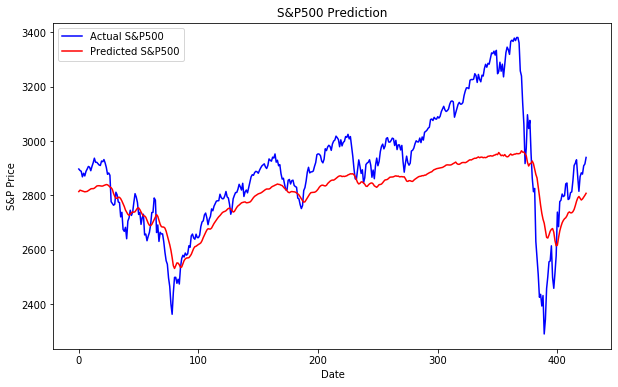

In [64]:
plt.figure(figsize = (10,6))
plt.plot(df_testing_processed, color = 'blue', label = 'Actual S&P500')
plt.plot(predictions, color = 'red', label = 'Predicted S&P500')
plt.title('S&P500 Prediction')
plt.xlabel('Date')
plt.ylabel('S&P Price')
plt.legend()
plt.show()